# Parte B - Analise e Descricao das Variaveis

Inicializaçao e seleção, dentre os dados brutos, os dado de interesse para o objetivo do trabalho

In [497]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.display import display_html
import plotly.express as px


In [498]:
PATH = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath(__name__))), "data/2025MAE121dados.xlsx")
dados_brutos = pd.read_excel(PATH, sheet_name="dados")
dados_brutos = dados_brutos[['Ident', 'Altura', 'Peso', 'Alimentação', 'Tempo_sono', 'Tempo_tela', "Gênero"]]
dados_brutos.set_index('Ident', inplace=True)
dados_brutos.info()
dados = pd.DataFrame([], index=dados_brutos.index)


<class 'pandas.core.frame.DataFrame'>
Index: 118 entries, 1 to 118
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Altura       118 non-null    int64  
 1   Peso         118 non-null    float64
 2   Alimentação  118 non-null    object 
 3   Tempo_sono   118 non-null    float64
 4   Tempo_tela   118 non-null    float64
 5   Gênero       118 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 6.5+ KB


## Variaveis referentes ao comportamento do aluno ("Variaveis "Independentes")

### Tempo de sono
Tratamento: Algumas entradas apresentados hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [501]:
dados['Tempo_sono'] = dados_brutos['Tempo_sono'].round(0).astype(int)
freq_tempo_sono = dados['Tempo_sono'].value_counts().sort_index()
freq_tempo_sono.to_frame()

,count
Tempo_sono,
4,1
5,6
6,34
7,39
8,30
9,8


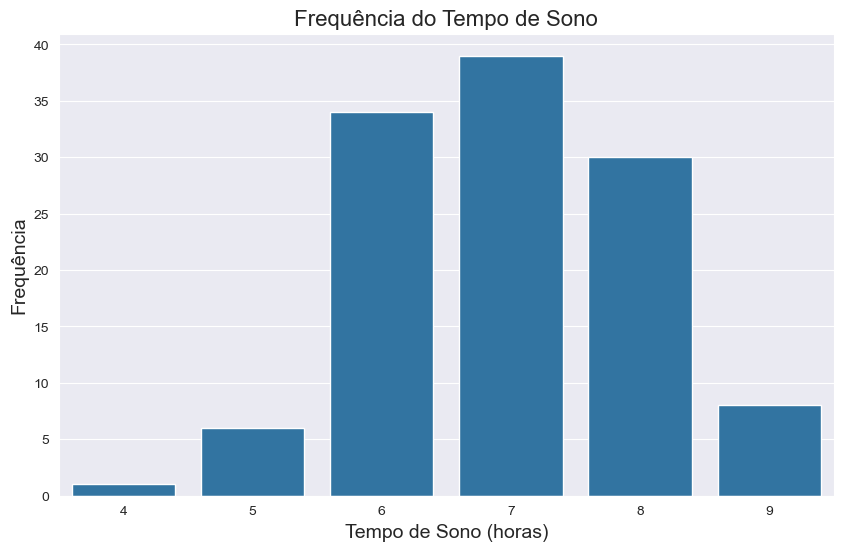

In [502]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.barplot(x=freq_tempo_sono.index, y=freq_tempo_sono.values)

plt.title('Frequência do Tempo de Sono', fontsize=16)
plt.xlabel('Tempo de Sono (horas)', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.show()

### Alimentação


@Leandro Fernandes: adicionei handler para variavel categorica ordinal sempre quando possivel caso seja util para tua analise

In [504]:
dados["Alimentação"] = dados_brutos["Alimentação"].copy().astype("category")
ALIMENTORDER = ['Nada saudável', 'Pouco saudável', 'Saudável', 'Razoavelmente saudável','Muito saudável']
dados["Alimentação"] = dados["Alimentação"].cat.reorder_categories(ALIMENTORDER, ordered=True)

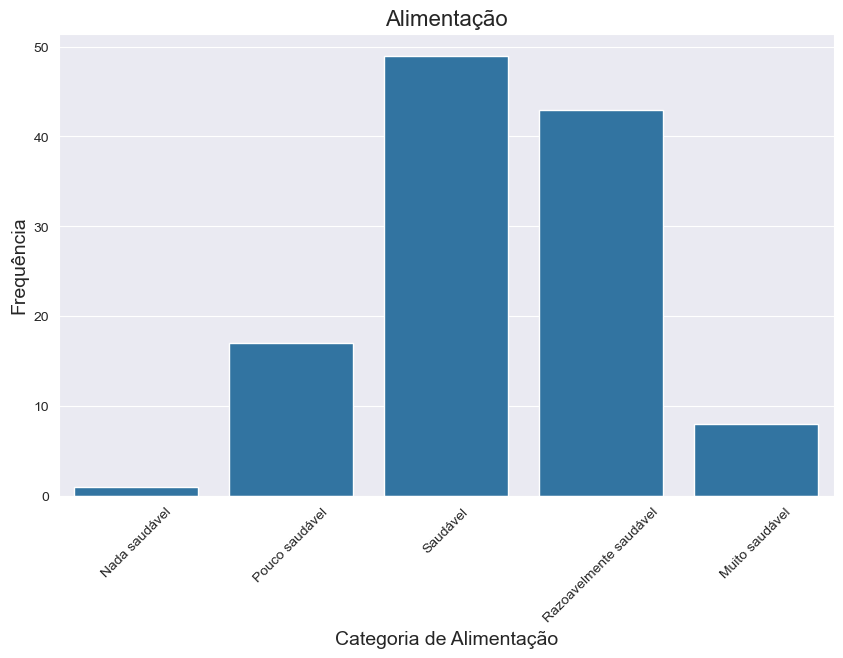

In [505]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Contar a frequência de cada categoria na variável "Alimentação"
freq_alimentacao = dados['Alimentação'].value_counts().reindex(ALIMENTORDER)

# Criar o gráfico de colunas
sns.barplot(x=freq_alimentacao.index, y=freq_alimentacao.values, order=ALIMENTORDER)

# Adicionar título e rótulos
plt.title('Alimentação', fontsize=16)
plt.xlabel('Categoria de Alimentação', fontsize=14)
plt.ylabel('Frequência', fontsize=14)
plt.xticks(rotation=45)
plt.show()

### Tempo de Tela

Tratament: Alguns dados foram entrados com hora fracionada. Os dados foram tratados, de modo a arrendondar para a hora inteira mais proxima.

In [507]:
dados['Tempo_tela'] = dados_brutos['Tempo_tela'].round(0).astype(int)
dados['Tempo_tela'].describe()


count    118.000000
mean       6.550847
std        3.214809
min        0.000000
25%        4.000000
50%        6.000000
75%        8.750000
max       17.000000
Name: Tempo_tela, dtype: float64

In [508]:
# Definir os intervalos de 2 horas, ajustando o último bin para incluir 14-16 horas
bins_tempo_tela = list(range(0, 15, 2)) +[18]
tab_freq_tempo_tela = pd.cut(dados['Tempo_tela'], bins=bins_tempo_tela, right=False)
# Contar a frequência e calcular a densidade
freq_tempo_tela = tab_freq_tempo_tela.value_counts().sort_index()
densidade_tempo_tela = freq_tempo_tela / freq_tempo_tela.sum()
densidade_tempo_tela.to_frame("densidade_tempo_tela")

,densidade_tempo_tela
Tempo_tela,
"[0, 2)",0.025424
"[2, 4)",0.144068
"[4, 6)",0.228814
"[6, 8)",0.245763
"[8, 10)",0.144068
"[10, 12)",0.135593
"[12, 14)",0.059322
"[14, 18)",0.016949


@ leandro, note que aqui usei a frequencia no eixo y ao inves da frequencia relativa porque o ultimo intervalo é maior que os demais. Achoq que é isso que o prof. fala no livro. Se for, vale mencionar isso para dizer como este livro de statistica é muito bom.

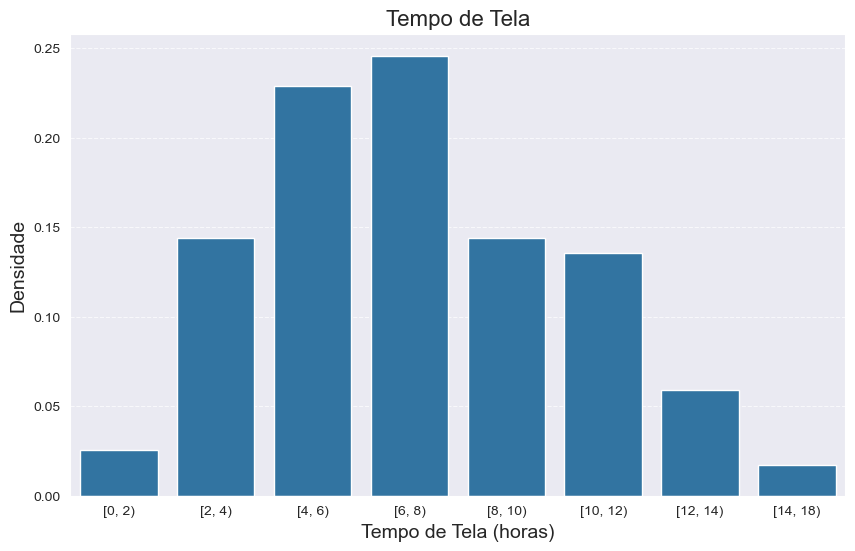

In [510]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")

# Criar o gráfico de colunas
sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)
# sns.barplot(x=densidade_tempo_tela.index.astype(str), y=densidade_tempo_tela.values)


# Adicionar título e rótulos
plt.title('Tempo de Tela', fontsize=16)
plt.xlabel('Tempo de Tela (horas)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.xticks(ticks=range(len(bins_tempo_tela) - 1), labels=[f"{i}" for i in bins_tempo_tela[:-1]], rotation=0)


In [511]:
# Criar tabela de frequência para as faixas de 2 horas
tabela_frequencia_tempo_tela = freq_tempo_tela.to_frame(name='Frequência')
tabela_frequencia_tempo_tela.index.name = 'Faixa de Tempo de Tela'
tabela_frequencia_tempo_tela.reset_index(inplace=True)
tabela_frequencia_tempo_tela

,Faixa de Tempo de Tela,Frequência
0,"[0, 2)",3
1,"[2, 4)",17
2,"[4, 6)",27
3,"[6, 8)",29
4,"[8, 10)",17
5,"[10, 12)",16
6,"[12, 14)",7
7,"[14, 18)",2


### Sexo

Tratamento: optei por agrupar "outro" com "prefiro na dizer" dado que sao poucos os casos e nao vejo possvel tirar nuhuma conclusao relevadncom com apenas 2 data points em cada caso.

In [513]:
dados['Sexo'] = dados_brutos['Gênero'].copy()
dados.loc[dados["Sexo"].isin(["Outro", "Prefiro não dizer"]), "Sexo"] = "Outro/Prefiro não dizer"
tab_freq_sexo = dados['Sexo'].value_counts()
tab_freq_sexo

Sexo
Masculino                  93
Feminino                   21
Outro/Prefiro não dizer     4
Name: count, dtype: int64

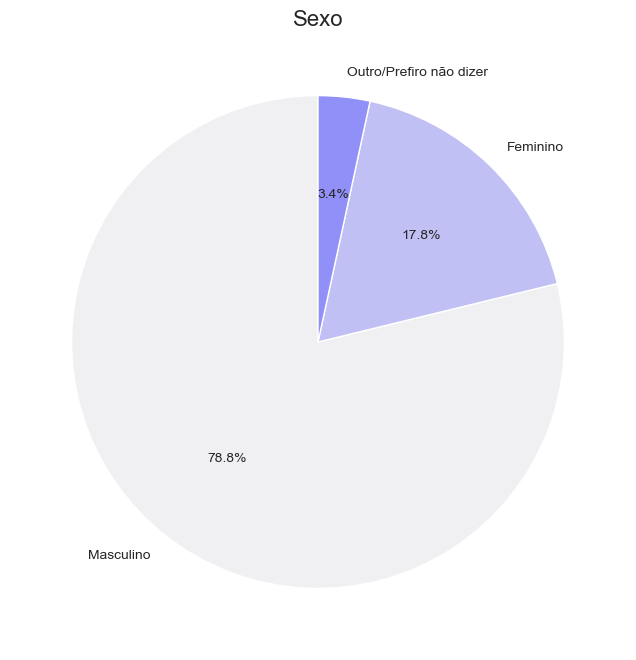

In [514]:
# Criar um gráfico de pizza para os dados de "Sexo"
plt.figure(figsize=(8, 8))
plt.pie(
    tab_freq_sexo.values,
    labels=tab_freq_sexo.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("light:b"),
)
plt.title('Sexo', fontsize=16)
# Exibir o gráfico
plt.show()

## Variaveis para composicao da métrica IMC ("variavel dependentes")

### Altura
Nenhum tratamento do dado foi necessario

In [517]:
# Tratamento (nenhum necessario)
dados['Altura'] =dados_brutos['Altura']
dados['Altura'].describe()

count    118.000000
mean     173.635593
std        8.541168
min      150.000000
25%      170.000000
50%      173.000000
75%      180.000000
max      196.000000
Name: Altura, dtype: float64

In [518]:
# Criar os intervalos de 10 cm
bins = range(dados['Altura'].min() // 10 * 10, dados['Altura'].max() // 10 * 10 + 10, 10)
labels = [f"{i}-{i+9}" for i in bins[:-1]]
tab_freq_altura = pd.cut(dados['Altura'], bins=bins, labels=labels, right=False)
tab_freq_altura = tab_freq_altura.value_counts().sort_index()
tab_freq_altura.to_frame("Frequência")

,Frequência
Altura,
150-159,5
160-169,21
170-179,61
180-189,26


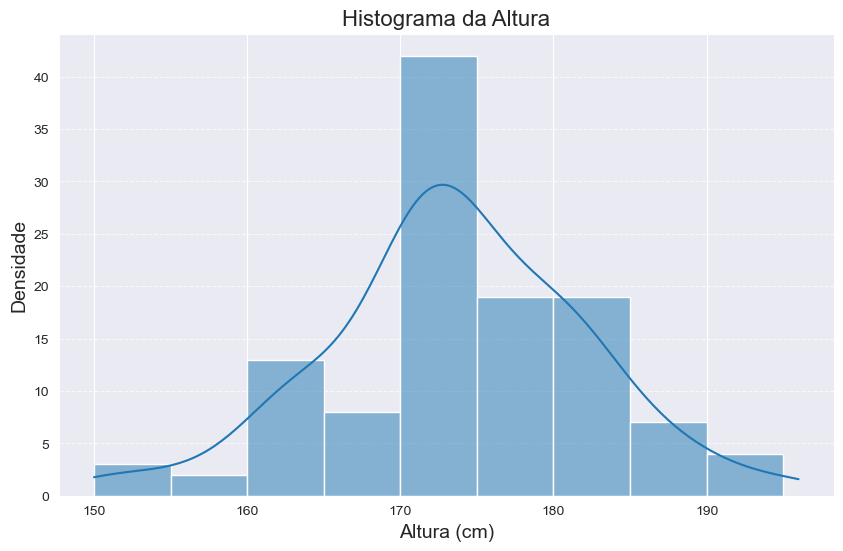

In [519]:
# Create a histogram with nice round bins
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Altura'], bins=range(150, 200, 5), kde=True)

# Add labels and title
plt.title('Histograma da Altura', fontsize=16)
plt.xlabel('Altura (cm)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Peso
Tratamento: Alguns dados na entrada haviam sido passados como valor decimal. Esses valores foram truncados para o inteiro mais proximo, resultando em todos os dados sendo inteiros

In [521]:
dados['Peso'] = dados_brutos['Peso'].round(0)
dados['Peso'].describe()

count    118.000000
mean      71.440678
std       14.977215
min       42.000000
25%       60.000000
50%       69.500000
75%       80.000000
max      120.000000
Name: Peso, dtype: float64

In [522]:
# Criar os intervalos de 10 kg
bins_peso = range(int(dados['Peso'].min()) // 10 * 10, int(dados['Peso'].max()) // 10 * 10 + 10, 10)
labels_peso = [f"{i}-{i+9}" for i in bins_peso[:-1]]

# Agrupar os dados em faixas de 10 kg e contar as ocorrências
tab_freq_peso = pd.cut(dados['Peso'], bins=bins_peso, labels=labels_peso, right=False)
tab_freq_peso = tab_freq_peso.value_counts().sort_index()
tab_freq_peso.to_frame("Frequência")

,Frequência
Peso,
40-49,3
50-59,21
60-69,35
70-79,28
80-89,15
90-99,10
100-109,4
110-119,1


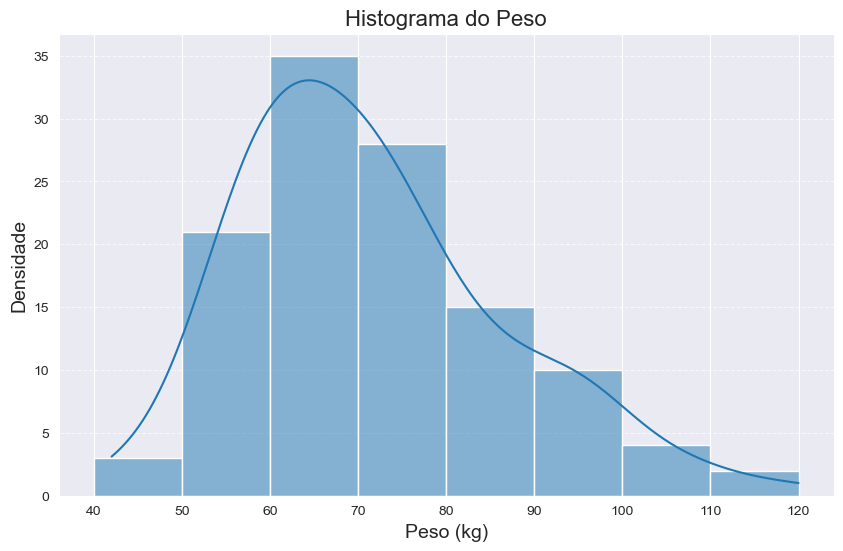

In [523]:
# Criar histograma para a variável "Peso"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['Peso'], bins=bins_peso, kde=True)

# Adicionar título e rótulos
plt.title('Histograma do Peso', fontsize=16)
plt.xlabel('Peso (kg)', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### IMC
Tratamento: O IMC foi calculado a partir da altura e do peso, utilizando a formula IMC = peso / (altura * altura). O resultado foi arredondado para duas casas decimais.

#### Construcao da variavel

In [525]:
dados['IMC'] = (dados['Peso'] / ((dados['Altura'] / 100) ** 2)).round(2)
dados['IMC'].describe()

count    118.000000
mean      23.660678
std        4.522529
min       15.620000
25%       20.630000
50%       22.700000
75%       25.480000
max       37.870000
Name: IMC, dtype: float64

#### Descrição da variavel

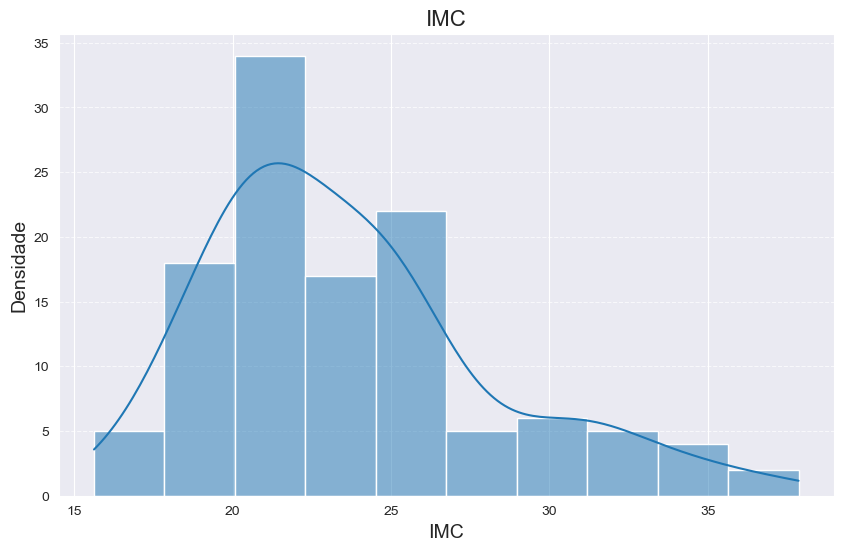

In [527]:
# Criar histograma para a variável "IMC"
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.histplot(dados['IMC'], bins=10, kde=True)

# Adicionar título e rótulos
plt.title('IMC', fontsize=16)
plt.xlabel('IMC', fontsize=14)
plt.ylabel('Densidade', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Coeficiente de Bowley mostra ligeiro skweness ( assimetria) positivo do dado:



In [529]:
# Calcular os quartis
Q1 = dados['IMC'].quantile(0.25)
Q2 = dados['IMC'].quantile(0.50)
Q3 = dados['IMC'].quantile(0.75)

# Calcular o coeficiente de Bowley
skewness_bowley = (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)
print(f"Coef Bowley: {float(skewness_bowley):.3f}")

Coef Bowley: 0.146


#### Interpretação do IMC (faixas de referência)
- Abaixo do peso: IMC < 18.5
- Peso normal: 18.5 <= IMC < 24.9
- Sobrepeso: 25 <= IMC < 29.9
- Obesidade grau 1: 30 <= IMC < 34.9
- Obesidade grau 2: 35 <= IMC < 39.9
- Obesidade grau 3: IMC >= 40


In [531]:
# Categorizar os valores de IMC com base nas faixas de referência
faixas_imc = ['Abaixo do peso', 'Peso normal', 'Sobrepeso', 'Obesidade grau 1', 'Obesidade grau 2', 'Obesidade grau 3']
bins_imc = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
dados['Faixa_IMC'] = pd.cut(dados['IMC'], bins=bins_imc, labels=faixas_imc, right=False)
dados['Faixa_IMC'].cat.set_categories(faixas_imc, ordered=True)
freq_faixa_imc = dados['Faixa_IMC'].value_counts().reindex(faixas_imc)
freq_faixa_imc.to_frame("Frequência")

,Frequência
Faixa_IMC,
Abaixo do peso,9
Peso normal,69
Sobrepeso,25
Obesidade grau 1,12
Obesidade grau 2,3
Obesidade grau 3,0


Os dados abaixo retirei de : 
https://sbcbm.org.br/obesidade-atinge-mais-de-67-milhoes-de-pessoas-no-brasil-em-2022/
Mas a fonte e FONTE: SISTEMA DE ViGiLÂNCiA ALIMENTAR E NUTRICIONAL - SiSVAN I MINISTÉRIO DA SAÚDE

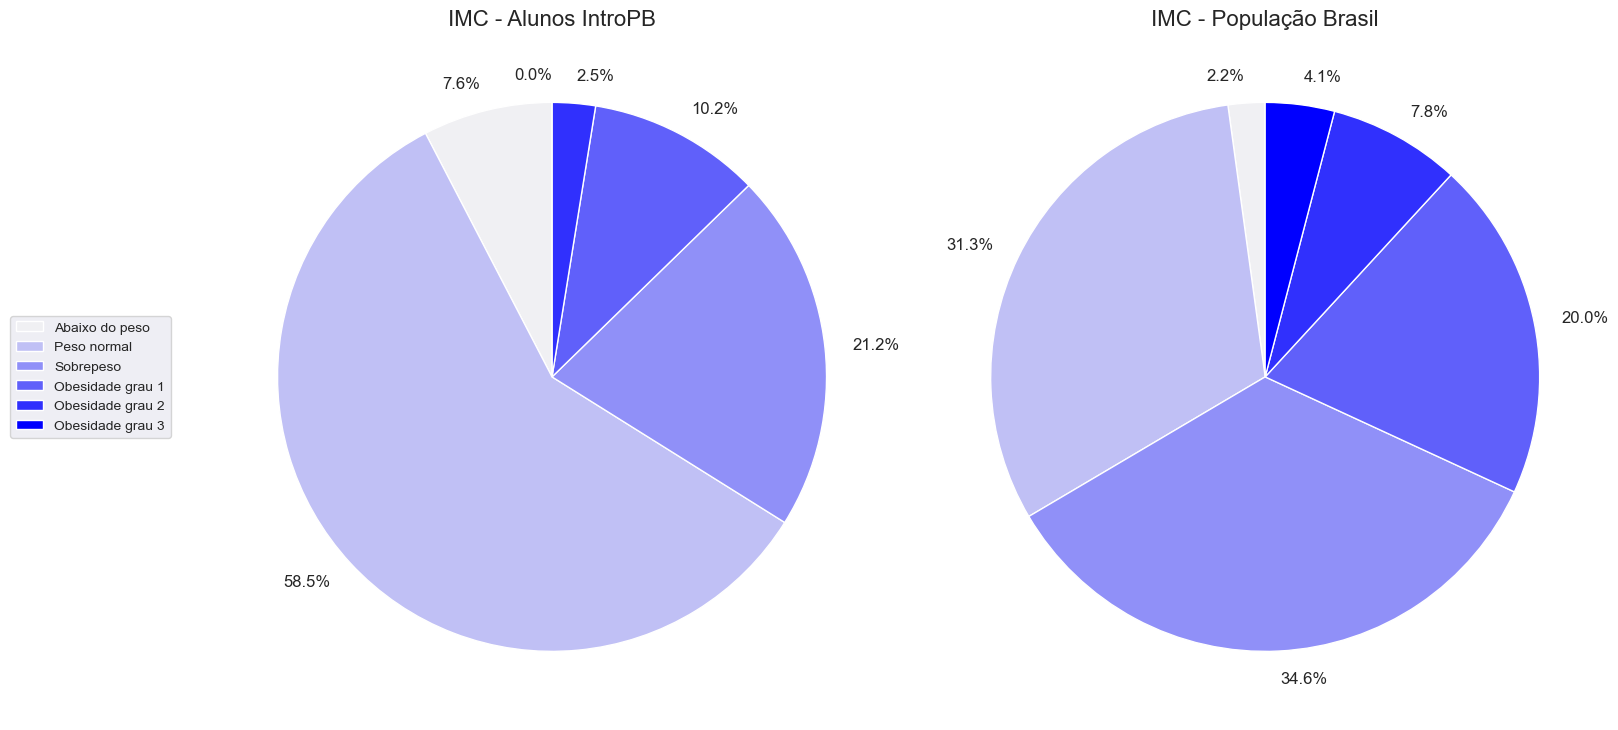

In [533]:
# Tabela com dado de referência
comparativo_imc = freq_faixa_imc.to_frame(name='Alunos_IntroPB')
comparativo_imc['Alunos_IntroPB'] = comparativo_imc['Alunos_IntroPB'] / comparativo_imc['Alunos_IntroPB'].sum()
DATABRL = [0.0217, 0.3132, 0.3463, 0.2004, 0.0777, 0.0407]
assert sum(DATABRL) == 1    
comparativo_imc["Populacao_Brasil"] = DATABRL
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico da esquerda: Alunos_IntroPB
axes[0].pie(
    comparativo_imc['Alunos_IntroPB'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Alunos_IntroPB']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[0].set_title('IMC - Alunos IntroPB', fontsize=16)
axes[0].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(-0.3, 0.5))

# Gráfico da direita: Populacao_Brasil
axes[1].pie(
    comparativo_imc['Populacao_Brasil'],
    labels=[f"{value * 100:.1f}%" for value in comparativo_imc['Populacao_Brasil']],
    startangle=90,
    colors=sns.color_palette("light:b"),
    # autopct='%1.1f%%',
    textprops={'fontsize': 12}
)
axes[1].set_title('IMC - População Brasil', fontsize=16)
# axes[1].legend(labels=comparativo_imc.index, loc='center left', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

In [534]:
comparativo_imc

,Alunos_IntroPB,Populacao_Brasil
Faixa_IMC,,
Abaixo do peso,0.076271,0.0217
Peso normal,0.584746,0.3132
Sobrepeso,0.211864,0.3463
Obesidade grau 1,0.101695,0.2004
Obesidade grau 2,0.025424,0.0777
Obesidade grau 3,0.000000,0.0407


#### IMC vs. valores esperados por uma normal

A conclusão é que a turma desvia um pouco da distribuição normal,especialmente nos extremos, onde a turma apresenta tails mais longos. Isso pode ser resultado de que a amostra da turma e pequena, ou não é representativa da população brasileir (oque faz muito sentido.)

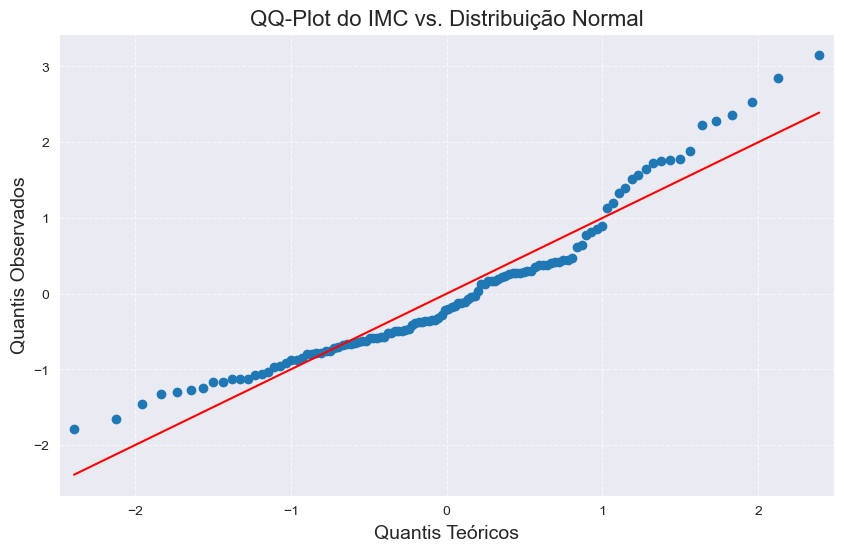

In [536]:
plt.figure(figsize=(10, 6))
qqplot(dados['IMC'], line='s', ax=plt.gca(),  fit=True)
plt.title('QQ-Plot do IMC vs. Distribuição Normal', fontsize=16)
plt.xlabel('Quantis Teóricos', fontsize=14)
plt.ylabel('Quantis Observados', fontsize=14)
plt.grid(axis='both', linestyle='--', alpha=0.7)

plt.show()

@ Se der tempo (e encontrarmos o dado na internet), para o relatorio, seria interesente fazer um QQPlot comparando a distribuicao do IMC da classe com o o IMC da populacao brasileira. Tenho impressao que estamos mais no shape do que media da populacao.


## Notas para a parte C

Até aqui cumprimos com quase todos os topicos do livro do capitulo 1: 
 - tabelas de frequencia
 - graficos de barra (desidade vs. frequencia)
 - histogramas
 - grafico setor
 - qq plot

A parte C deveria apresentar pelo menos:
 - box-plot (na comparacao da distribuica do IMC aberto por varivel categorica)
 - grafico de dispersao (IMC vs. variavel continua "Indice de saudabilidade) (se formos criar e usar caso o resultdo nao fique bom...)
 


## Criando faixas para Tempo_sono

como os valores unicos são : [6 9 8 5 7 4]

Valores menores que 6 serão classificados como Baixo

Valores maiores ou iguais a 6 e menores que 8 serão Médio

Valores maiores ou iguais a 8 serão Alto


## Criando faixas para Tempo_tela
como os valores unicos são : [ 3  2  8  6 10  4  7 11  5 12  0 13  9 17 16  1]

Intervalo de 0 a 6 (exclusivo do 6) recebe o rótulo 'Baixo';

Intervalo de 6 a 8 recebe o rótulo 'Médio';

Intervalo de 8 a 12 recebe o rótulo 'Alto'.



In [586]:
#Define os cortes e rótulos 
bins_sono = [0, 6, 8, 12]
bins_tela = [0, 6, 12, 18]
labels = ['Baixo', 'Médio', 'Alto']

# Cria as faixas diretamente no DataFrame
dados['faixa_sono'] = pd.cut(dados['Tempo_sono'], bins=bins_sono, labels=labels, right=False)
dados['faixa_sono'] = pd.Categorical(dados['faixa_sono'], categories=labels, ordered=True)

dados['faixa_tela'] = pd.cut(dados['Tempo_tela'], bins=bins_tela, labels=labels, right=False)
dados['faixa_tela'] = pd.Categorical(dados['faixa_tela'], categories=labels, ordered=True)

# Criando tabelas de frequencias para comparar os sexos em relação ao tempo de sono e tempo de tela.
Para isso foi dividido em faixas agrupando as ocorrencias 

In [591]:
# Tabela cruzada crua
freq_bruta = pd.crosstab(dados['Tempo_sono'], dados['Tempo_tela'])

# Tabela visual com gradiente (estilo Jupyter)
print("📊 Tabela de Frequência (Tempo_sono × Tempo_tela) - SEM faixas:")
freq_bruta.style.background_gradient(cmap='Blues').format('{:.0f}')


📊 Tabela de Frequência (Tempo_sono × Tempo_tela) - SEM faixas:


Tempo_tela,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16,17
Tempo_sono,,,,,,,,,,,,,,,,
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,1,0,1,0,0,1,0,0,3,0,0,0,0,0,0,0
6,1,1,2,3,2,3,2,5,3,2,3,3,2,1,0,1
7,0,0,1,6,4,3,7,3,3,2,6,1,3,0,0,0
8,0,0,2,0,8,4,8,1,3,0,3,0,0,0,1,0
9,0,0,0,2,1,1,1,1,0,1,0,0,1,0,0,0


In [593]:
# Exempl#o para o grupo “Total”
styled_abs = (
    freq_total.style
        .set_caption("Frequência Absoluta (Total)")
        .background_gradient(cmap='Blues')
        .format("{:.0f}")
        .set_table_attributes("style='display:inline-block; vertical-align:top; margin-right:20px;'")
)
styled_pct = (
    freq_total_pct.style
        .set_caption("Frequência Relativa (%) (Total)")
        .background_gradient(cmap='Purples')
        .format("{:.1f}%")
        .set_table_attributes("style='display:inline-block; vertical-align:top;'")
)
display_html(styled_abs._repr_html_() + styled_pct._repr_html_(), raw=True)
# Para Homens
styled_abs = (
    freq_homens.style
        .set_caption("Frequência Absoluta (Homens)")
        .background_gradient(cmap='Blues')
        .format("{:.0f}")
        .set_table_attributes("style='display:inline-block; vertical-align:top; margin-right:20px;'")
)
styled_pct = (
    freq_homens_pct.style
        .set_caption("Frequência Relativa (%) (Homens)")
        .background_gradient(cmap='Purples')
        .format("{:.1f}%")
        .set_table_attributes("style='display:inline-block; vertical-align:top;'")
)
display_html(styled_abs._repr_html_() + styled_pct._repr_html_(), raw=True)

# Para Mulheres
styled_abs = (
    freq_mulheres.style
        .set_caption("Frequência Absoluta (Mulheres)")
        .background_gradient(cmap='Blues')
        .format("{:.0f}")
        .set_table_attributes("style='display:inline-block; vertical-align:top; margin-right:20px;'")
)
styled_pct = (
    freq_mulheres_pct.style
        .set_caption("Frequência Relativa (%) (Mulheres)")
        .background_gradient(cmap='Purples')
        .format("{:.1f}%")
        .set_table_attributes("style='display:inline-block; vertical-align:top;'")
)
display_html(styled_abs._repr_html_() + styled_pct._repr_html_(), raw=True)



Frequência Absoluta (Total) 
 
 
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 3 
 4 
 0 
 
 
 Médio 
 26 
 40 
 7 
 
 
 Alto 
 18 
 18 
 2 
 
 
 

 
 Frequência Relativa (%) (Total) 
 
 
   
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 Baixo 
 42.9% 
 57.1% 
 0.0% 
 
 
 Médio 
 Médio 
 35.6% 
 54.8% 
 9.6% 
 
 
 Alto 
 Alto 
 47.4% 
 47.4% 
 5.3%

Frequência Absoluta (Homens) 
 
 
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 2 
 4 
 0 
 
 
 Médio 
 18 
 35 
 6 
 
 
 Alto 
 13 
 14 
 1 
 
 
 

 
 Frequência Relativa (%) (Homens) 
 
 
   
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 Baixo 
 33.3% 
 66.7% 
 0.0% 
 
 
 Médio 
 Médio 
 30.5% 
 59.3% 
 10.2% 
 
 
 Alto 
 Alto 
 46.4% 
 50.0% 
 3.6%

Frequência Absoluta (Mulheres) 
 
 
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 1 
 0 
 0 
 
 
 Médio 
 7 
 4 
 1 
 
 
 Alto 
 4 
 3 
 1 
 
 
 

 
 Frequência Relativa (%) (Mulheres) 
 
 
   
 faixa_tela 
 Baixo 
 Médio 
 Alto 
 
 
 faixa_sono 
 faixa_sono 
   
   
   
 
 
 
 
 Baixo 
 Baixo 
 100.0% 
 0.0% 
 0.0% 
 
 
 Médio 
 Médio 
 58.3% 
 33.3% 
 8.3% 
 
 
 Alto 
 Alto 
 50.0% 
 37.5% 
 12.5%

# Comparação do IMC por faixa e faixas de tempo de sono
faixas de IMC observadas: 'Abaixo do peso' < 'Peso normal' < 'Sobrepeso' < 'Obesidade grau 1' < 'Obesidade grau 2' < 'Obesidade grau 3'
faixas de tempo de sono observadas:  [6, 9, 8, 5, 7, 4]


# Comentários

#### Nota‑se que a maior parte da turma está na faixa ‘Peso normal’ com ‘Sono médio’, sugerindo que esse grupo tem hábitos de descanso mais homogêneos.
#### A célula mais escura em (Peso normal, Sono médio) reforça a concentração apontada no gráfico de barras

# Criando tabelas com frequencia absoluta entre homens e mulheres

In [598]:
for sexo_cat, tables in freq_data.items():
    # Obtém as tabelas
    freq_abs = tables['abs'].copy()
    freq_pct = tables['pct'].copy().fillna(0)

    # Define nomes de eixos para clarificar linhas e colunas
    freq_abs = freq_abs.rename_axis(index='Faixa de IMC', columns='Faixa de Sono (h/dia)')
    freq_pct = freq_pct.rename_axis(index='Faixa de IMC', columns='Faixa de Sono (h/dia)')

    # Estiliza e formata as tabelas
    styled_abs = (
        freq_abs.style
                .set_caption(f"Frequência Absoluta ({sexo_cat})")
                .background_gradient(cmap='Blues')
                .format("{:.0f}")
                .set_table_attributes("style='display:inline-block; margin-right:30px;'")
    )
    styled_pct = (
        freq_pct.style
                .set_caption(f"Frequência Relativa (%) ({sexo_cat})")
                .background_gradient(cmap='Purples')
                .format("{:.1f}%")
                .set_table_attributes("style='display:inline-block;'")
    )

    # Exibe lado a lado
    html = styled_abs._repr_html_() + styled_pct._repr_html_()
    display_html(html, raw=True)

Faixa de Sono (h/dia),Baixo,Médio,Alto
Faixa de IMC,,,
Abaixo do peso,1,4,2
Peso normal,2,35,16
Sobrepeso,1,14,7
Obesidade grau 1,2,4,3
Obesidade grau 2,0,2,0
Obesidade grau 3,0,0,0
Faixa de Sono (h/dia),Baixo,Médio,Alto
Faixa de IMC,,,
Abaixo do peso,14.3%,57.1%,28.6%


Faixa de Sono (h/dia),Baixo,Médio,Alto
Faixa de IMC,,,
Abaixo do peso,0,1,1
Peso normal,0,9,6
Sobrepeso,1,0,0
Obesidade grau 1,0,1,1
Obesidade grau 2,0,1,0
Obesidade grau 3,0,0,0
Faixa de Sono (h/dia),Baixo,Médio,Alto
Faixa de IMC,,,
Abaixo do peso,0.0%,50.0%,50.0%


In [ ]:
# Comparativo de faixa de IMC por Faixa de sono

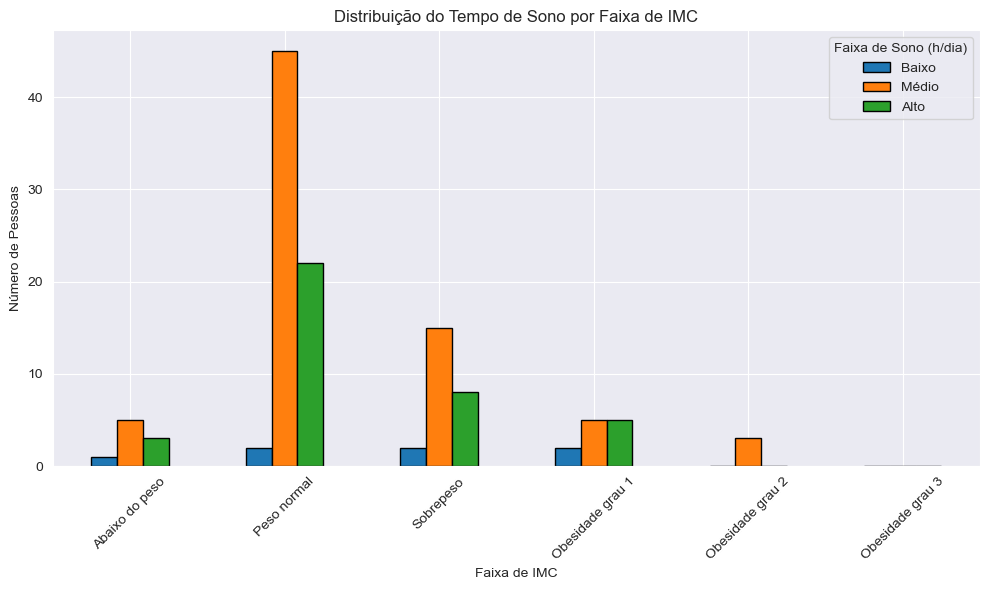

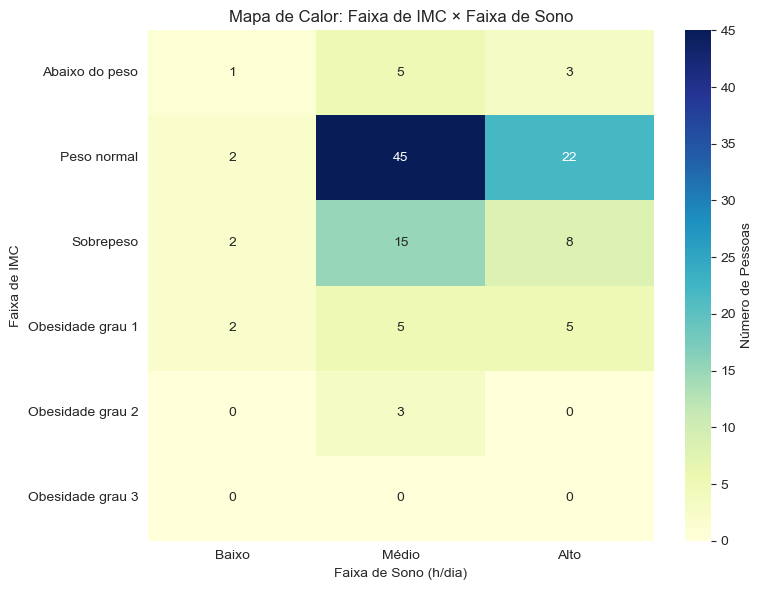

In [602]:
freq = pd.crosstab(
    index=dados['Faixa_IMC'],
    columns=dados['faixa_sono'],
    dropna=False
)

# 2) Gráfico de barras agrupadas
ax = freq.plot(
    kind='bar',
    figsize=(10, 6),
    edgecolor='black'
)
ax.set_title("Distribuição do Tempo de Sono por Faixa de IMC")
ax.set_xlabel("Faixa de IMC")
ax.set_ylabel("Número de Pessoas")
ax.legend(title="Faixa de Sono (h/dia)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3) Mapa de Calor (Heatmap)
plt.figure(figsize=(8, 6))
sns.heatmap(
    freq,
    annot=True,
    fmt='d',
    cmap='YlGnBu',
    cbar_kws={'label': 'Número de Pessoas'}
)
plt.title("Mapa de Calor: Faixa de IMC × Faixa de Sono")
plt.xlabel("Faixa de Sono (h/dia)")
plt.ylabel("Faixa de IMC")
plt.tight_layout()
plt.show()

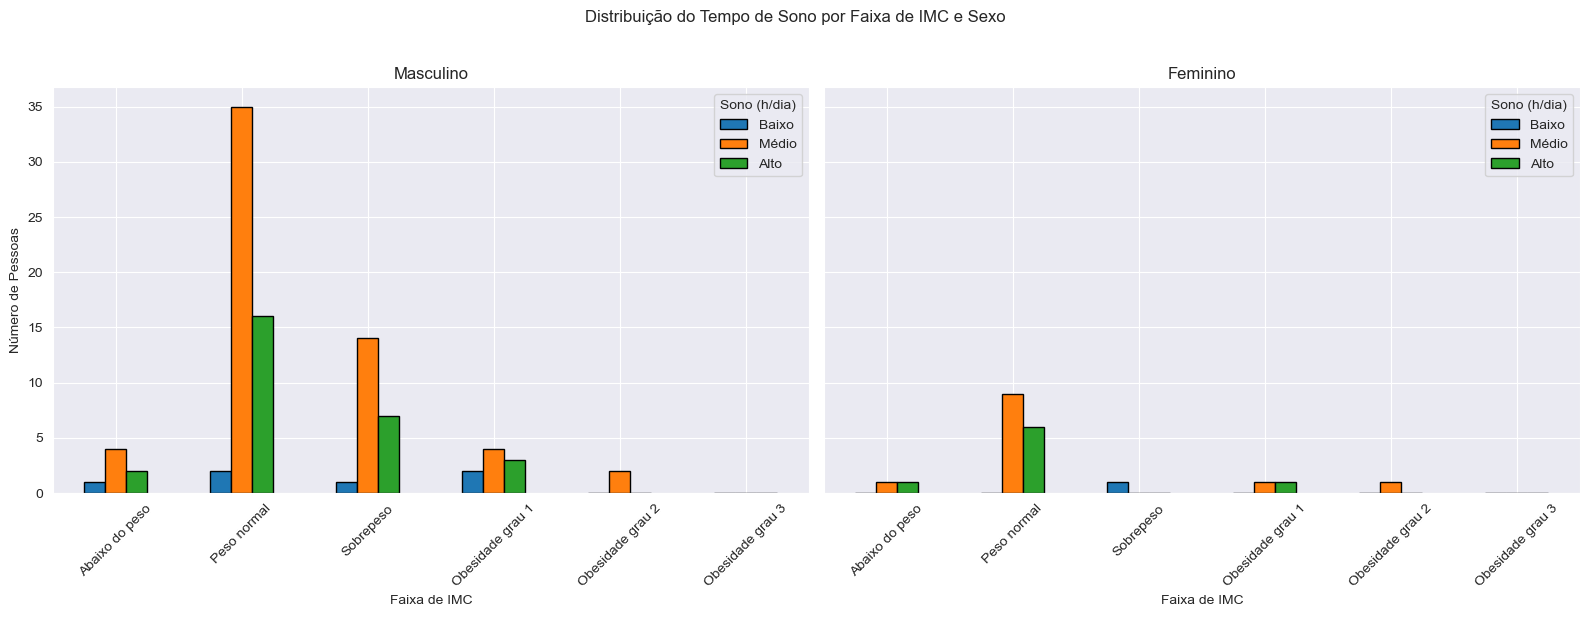

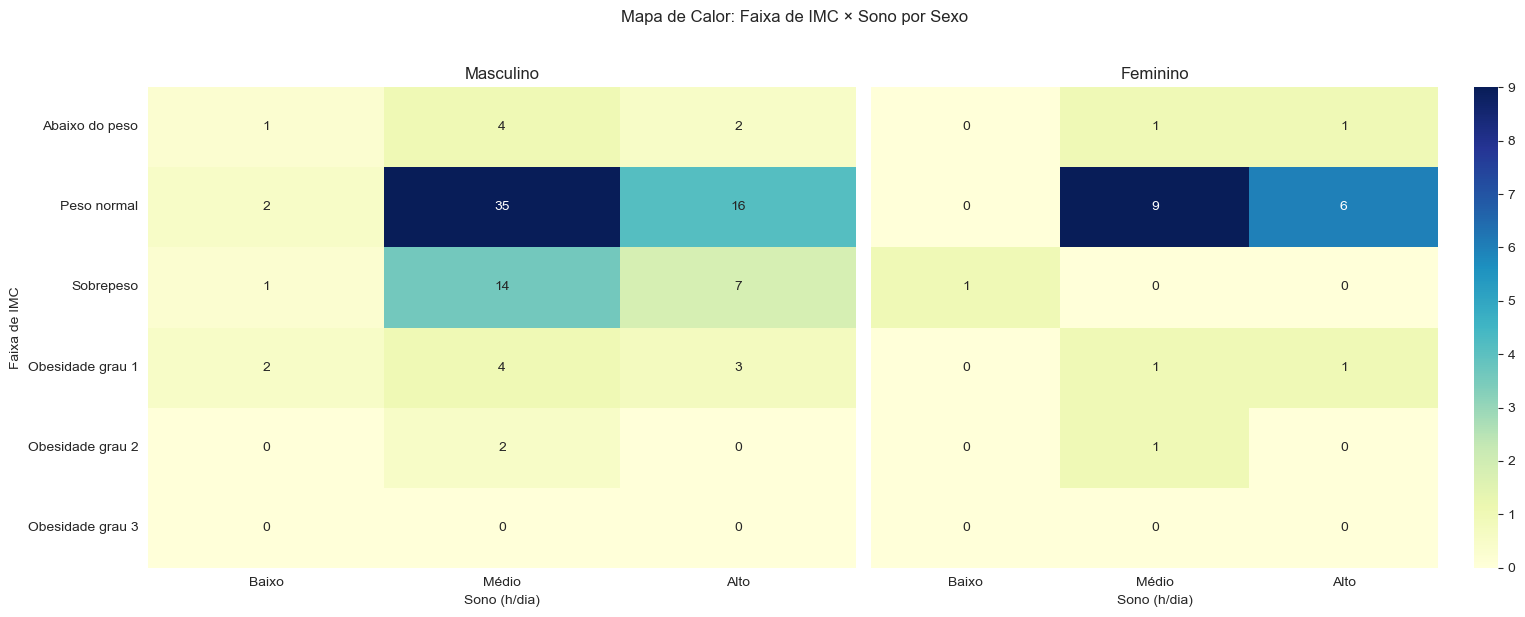

In [608]:
# Definindo a ordem das faixas
imc_order = dados['Faixa_IMC'].cat.categories if hasattr(dados['Faixa_IMC'], 'cat') else sorted(dados['Faixa_IMC'].unique())
sono_order = dados['faixa_sono'].cat.categories if hasattr(dados['faixa_sono'], 'cat') else sorted(dados['faixa_sono'].unique())

# 1) Cria figura com 1 linha e 2 colunas
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

for ax, sexo_cat in zip(axes, ['Masculino', 'Feminino']):
    # Filtra
    df_sex = dados[dados['Sexo'] == sexo_cat]
    # Crosstab
    freq = pd.crosstab(
        index=pd.Categorical(df_sex['Faixa_IMC'], categories=imc_order, ordered=True),
        columns=pd.Categorical(df_sex['faixa_sono'], categories=sono_order, ordered=True),
        dropna=False
    )
    # Barra agrupada no eixo específico
    freq.plot(
        kind='bar',
        ax=ax,
        edgecolor='black'
    )
    ax.set_title(f"{sexo_cat}")
    ax.set_xlabel("Faixa de IMC")
    if ax is axes[0]:
        ax.set_ylabel("Número de Pessoas")
    else:
        ax.set_ylabel("")  # esconde rótulo Y na segunda coluna
    ax.legend(title="Sono (h/dia)", loc='upper right')
    ax.tick_params(axis='x', rotation=45)

plt.suptitle("Distribuição do Tempo de Sono por Faixa de IMC e Sexo", y=1.02)
plt.tight_layout()
plt.show()


# 2) Mesma lógica para o heatmap
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharey=True)

for ax, sexo_cat in zip(axes, ['Masculino', 'Feminino']):
    df_sex = dados[dados['Sexo'] == sexo_cat]
    freq = pd.crosstab(
        index=pd.Categorical(df_sex['Faixa_IMC'], categories=imc_order, ordered=True),
        columns=pd.Categorical(df_sex['faixa_sono'], categories=sono_order, ordered=True),
        dropna=False
    )
    sns.heatmap(
        freq,
        annot=True,
        fmt='d',
        cmap='YlGnBu',
        cbar=(ax is axes[-1]),      # só mostra colorbar na direita
        ax=ax
    )
    ax.set_title(f"{sexo_cat}")
    ax.set_xlabel("Sono (h/dia)")
    if ax is axes[0]:
        ax.set_ylabel("Faixa de IMC")
    else:
        ax.set_ylabel("")  # esconde rótulo Y na segunda coluna

plt.suptitle("Mapa de Calor: Faixa de IMC × Sono por Sexo", y=1.02)
plt.tight_layout()
plt.show()

# Comentários
- Sono médio (6–8 h) é dominante em todas as faixas de IMC e em ambos os sexos.
- Homens com sobrepeso/obesidade apresentam maior proporção de sono alto (>8 h) que mulheres.
- Déficit de sono (<6 h) é raro e não se associa claramente ao IMC.
- Categorias de obesidade grau 2 e 3 têm amostras muito pequenas, inviabilizando conclusões.
- Diferença mais visível entre sexos ocorre no grupo de sono alto.


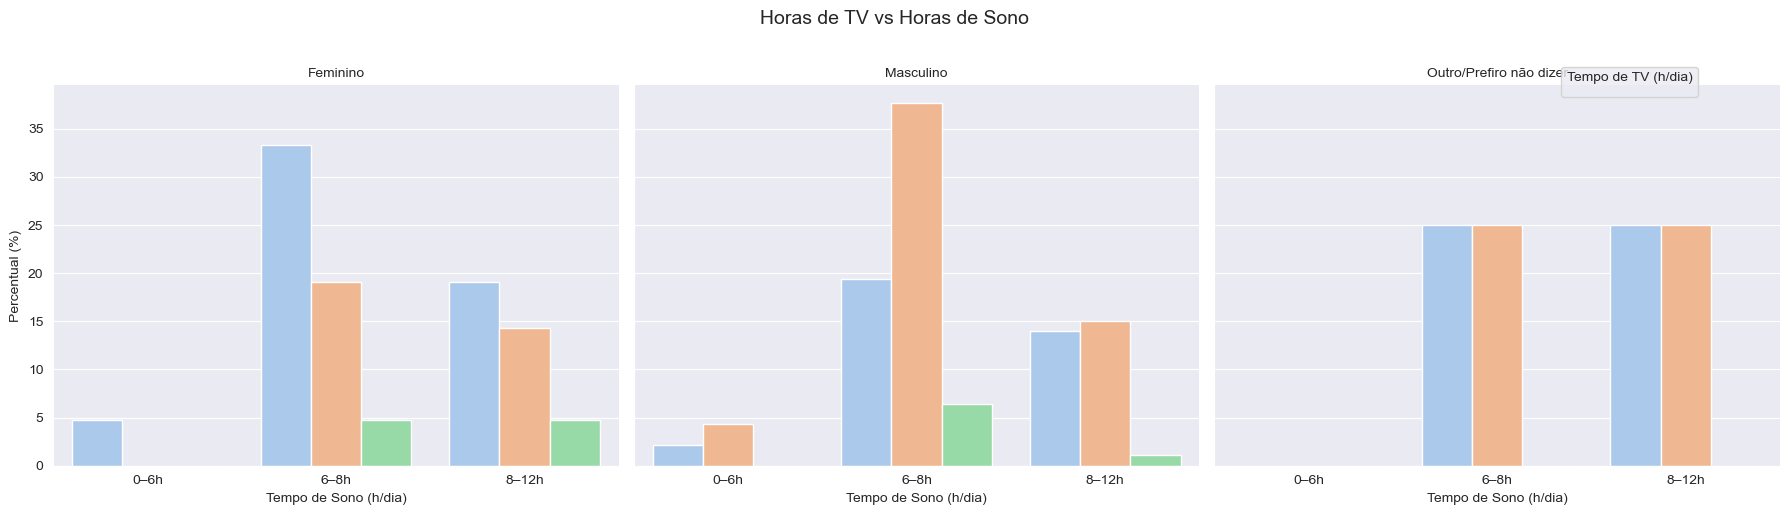

In [617]:
# 1) ordens originais
order_sono = ['Baixo','Médio','Alto']
order_tela = ['Baixo','Médio','Alto']

# 2) labels “humanas”
labels_sono_h = ['0–6h','6–8h','8–12h']
labels_tela_h = ['0–6h','6–12h','12–18h']

# 3) copia e garante categorias ordenadas
df = dados.copy()
df['faixa_sono'] = pd.Categorical(df['faixa_sono'], categories=order_sono, ordered=True)
df['faixa_tela'] = pd.Categorical(df['faixa_tela'], categories=order_tela, ordered=True)

# 4) agrupa e calcula contagens (observed=False para suprimir warning)
grp = (
    df
    .groupby(['Sexo','faixa_sono','faixa_tela'], observed=False)
    .size()
    .reset_index(name='Count')
)

# 5) converte em percentuais por sexo usando transform
grp['Percentual'] = grp.groupby('Sexo')['Count'] \
                      .transform(lambda x: 100 * x / x.sum())

# 6) mapeia para labels de horas
map_sono = dict(zip(order_sono, labels_sono_h))
map_tela = dict(zip(order_tela, labels_tela_h))
grp['Sono_h'] = grp['faixa_sono'].map(map_sono)
grp['TV_h']   = grp['faixa_tela'].map(map_tela)

# 7) plota catplot por Sexo
g = sns.catplot(
    data=grp,
    x='Sono_h', y='Percentual',
    hue='TV_h', col='Sexo',
    kind='bar',
    palette='pastel',
    order=labels_sono_h,
    hue_order=labels_tela_h,
    height=5, aspect=1.2,
    legend=False
)

# 8) legend e labels
g.set_axis_labels("Tempo de Sono (h/dia)", "Percentual (%)")
g.set_titles("{col_name}")
g.fig.suptitle("Horas de TV vs Horas de Sono", y=1.02, fontsize=14)

handles, labels = g.axes[0][0].get_legend_handles_labels()
g.fig.legend(handles, labels, title='Tempo de TV (h/dia)',
             loc='upper right', bbox_to_anchor=(0.95, 0.92))

plt.tight_layout()
plt.show()

# Comentários
- **Sono médio (6–8 h)** domina em todos os grupos, mas:
  - **Mulheres**: maior parte assiste TV 0–6 h (≈33%), seguida por 6–12 h (≈15%).
  - **Homens**: pico em TV 6–12 h (≈37%), depois 0–6 h (≈19%).
- **Sono curto (0–6 h)** é raro (<5%) em qualquer categoria de TV ou sexo.
- **Sono prolongado (8–12 h)** permanece baixo (<7%) para ambos, com leve ênfase em mulheres com TV 0–6 h.
- **“Outro/Prefiro não dizer”** mostra valores iguais (≈25%) em sono médio e alto, sugerindo amostra pequena ou uniformidade.


#  Grafico de tipo de alimentação Vs faixa de IMC

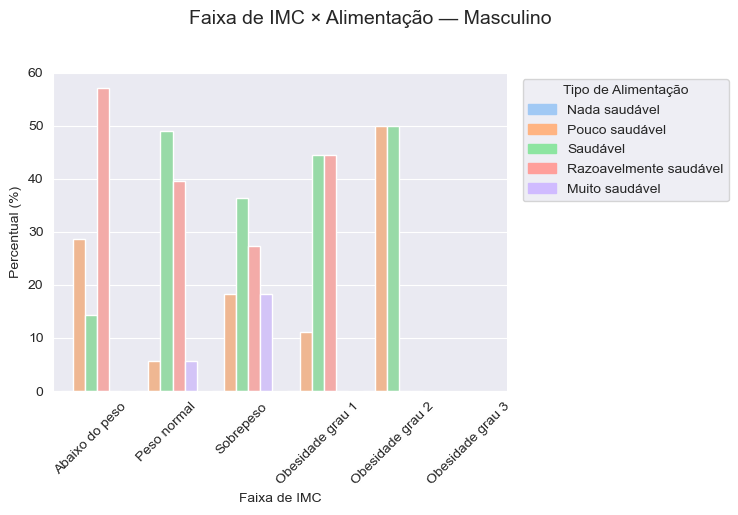

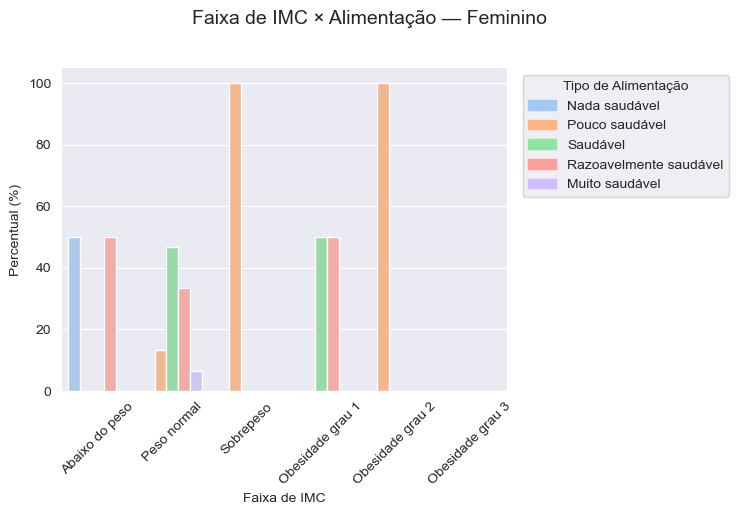

In [620]:
for sexo in ['Masculino', 'Feminino']:
    df = pct_crosstab(
        dados[dados['Sexo']==sexo],
        'Faixa_IMC', 'Alimentação',
        order_imc, order_alim
    )
    
    # 1) Gera o catplot sem legenda interna
    g = sns.catplot(
        data=df, x='Faixa_IMC', y='Percentual',
        hue='Alimentação', kind='bar',
        palette='pastel',
        order=order_imc, hue_order=order_alim,
        height=5, aspect=1.5,
        legend=False
    )
    ax = g.ax
    
    # 2) Reconstrói os handles da legenda usando exatamente a paleta "pastel"
    pal = sns.color_palette("pastel", n_colors=len(order_alim))
    handles = [
        mpatches.Patch(color=pal[i], label=order_alim[i])
        for i in range(len(order_alim))
    ]
    ax.legend(
        handles=handles,
        title='Tipo de Alimentação',
        bbox_to_anchor=(1.02, 1), loc='upper left'
    )
    
    # 3) Ajustes finais
    g.fig.suptitle(f"Faixa de IMC × Alimentação — {sexo}", y=1.02, fontsize=14)
    g.fig.subplots_adjust(right=0.75)
    ax.set_xlabel("Faixa de IMC")
    ax.set_ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Comentários

## Masculino
- **Peso normal:** maior proporção em “Saudável”.  
- **Sobrepeso e Obesidade:** aumento de “Pouco saudável” e presença de “Nada saudável”.  
- **Razoavelmente/Muito saudável:** sempre abaixo de 20%.

## Feminino
- **Todas as faixas:** dominância absoluta de “Pouco saudável”.  
- **“Nada saudável” e “Saudável”:** aparecem apenas em Abaixo do peso e Obesidade grau 1.  
- **“Muito saudável”:** ausente em toda a amostra.


# Grafico Faixa de IMC vs Tempo de Tela

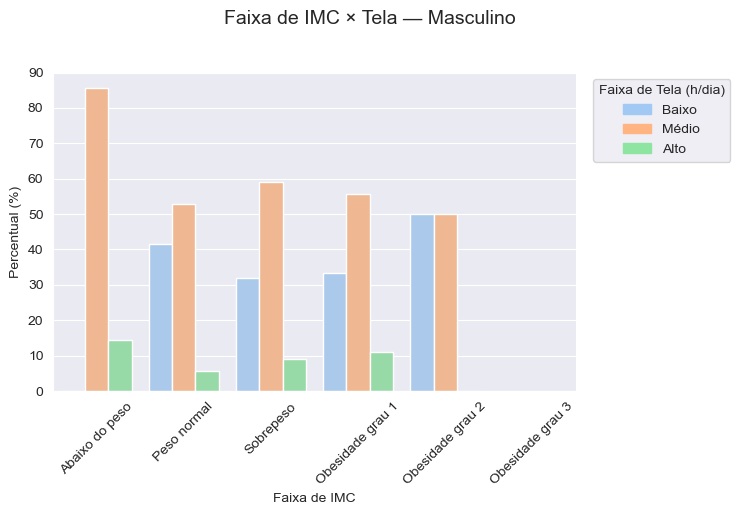

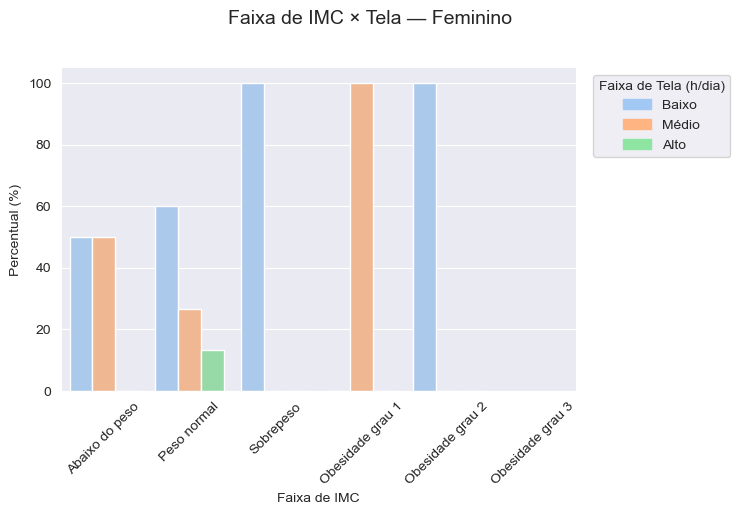

In [639]:

for sexo in ['Masculino', 'Feminino']:
    df = pct_crosstab(
        dados[dados['Sexo']==sexo],
        'Faixa_IMC', 'faixa_tela',
        order_imc, order_tela
    )
    g = sns.catplot(
        data=df, x='Faixa_IMC', y='Percentual',
        hue='faixa_tela', kind='bar',
        palette='pastel',
        order=order_imc, hue_order=order_tela,
        height=5, aspect=1.5, legend=False
    )
    ax = g.ax
    pal = sns.color_palette("pastel", n_colors=len(order_tela))
    handles = [mpatches.Patch(color=pal[i], label=order_tela[i])
               for i in range(len(order_tela))]
    ax.legend(handles=handles,
              title='Faixa de Tela (h/dia)',
              bbox_to_anchor=(1.02,1), loc='upper left')
    g.fig.suptitle(f"Faixa de IMC × Tela — {sexo}", y=1.02, fontsize=14)
    g.fig.subplots_adjust(right=0.75)
    ax.set_xlabel("Faixa de IMC")
    ax.set_ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Comentários:

## Masculino
- **Abaixo do peso:** ~80 % Baixo, ~15 % Médio, ~5 % Alto.  
- **Peso normal & Sobrepeso:** maioria em Médio (50–60 %), ~30–40 % Baixo e ~10 % Alto.  
- **Obesidade grau 1 & 2:** divisão quase equitativa entre Baixo e Médio, sem Alto.

## Feminino
- **Abaixo do peso:** cerca de 50 % Baixo, 40 % Médio, 10 % Alto.  
- **Peso normal:** 100 % Médio.  
- **Sobrepeso:** 100 % Baixo.  
- **Obesidade grau 1:** 100 % Médio.  
- **Obesidade grau 2 & 3:** sem observações na amostra.


# Gráfico de Faixa de sono vs IMC

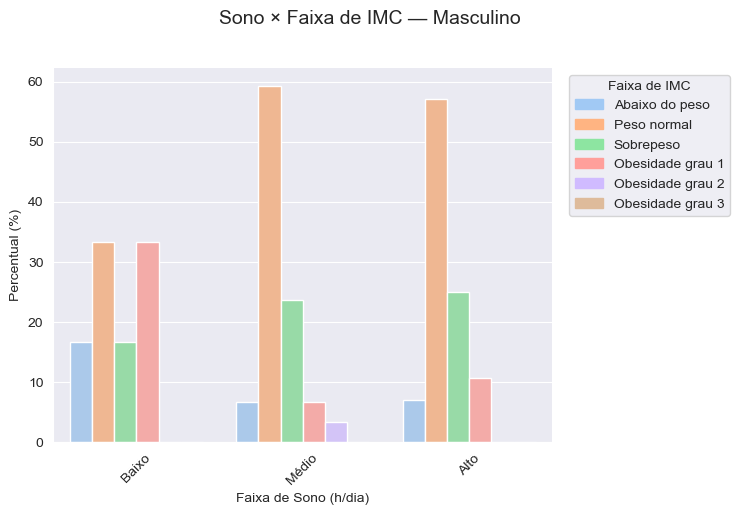

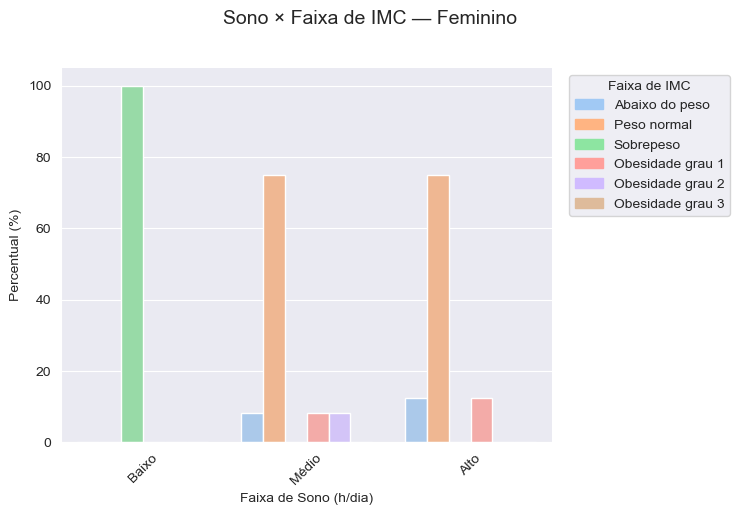

In [628]:
for sexo in ['Masculino', 'Feminino']:
    df = pct_crosstab(
        dados[dados['Sexo']==sexo],
        'faixa_sono', 'Faixa_IMC',
        order_sono, order_imc
    )
    g = sns.catplot(
        data=df, x='faixa_sono', y='Percentual',
        hue='Faixa_IMC', kind='bar',
        palette='pastel',
        order=order_sono, hue_order=order_imc,
        height=5, aspect=1.5, legend=False
    )
    ax = g.ax
    pal = sns.color_palette("pastel", n_colors=len(order_imc))
    handles = [mpatches.Patch(color=pal[i], label=order_imc[i])
               for i in range(len(order_imc))]
    ax.legend(handles=handles,
              title='Faixa de IMC',
              bbox_to_anchor=(1.02,1), loc='upper left')
    g.fig.suptitle(f"Sono × Faixa de IMC — {sexo}", y=1.02, fontsize=14)
    g.fig.subplots_adjust(right=0.75)
    ax.set_xlabel("Faixa de Sono (h/dia)")
    ax.set_ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()




# Comentários:

## Masculino
- **Baixo:** Peso normal domina mais ou menos 35 %), seguido por Sobrepeso e Obesidade 1 mais ou menos 5–20 % cada).  
- **Médio e Alto:** ambos têm > 60 % em Peso normal e mais ou menos 25 % em Sobrepeso; demais faixas ficam abaixo de 10 %.

## Feminino
- **Baixo:** 100 % em Sobrepeso.  
- **Médio:** mais ou menos 75 % em Peso normal, com pequenas porções em Abaixo do peso e Obesidade grau 1 (~10 %).  
- **Alto:** 100 % em Peso normal.  

# Gráfico de tempo de tela vs Tipo de alimentação

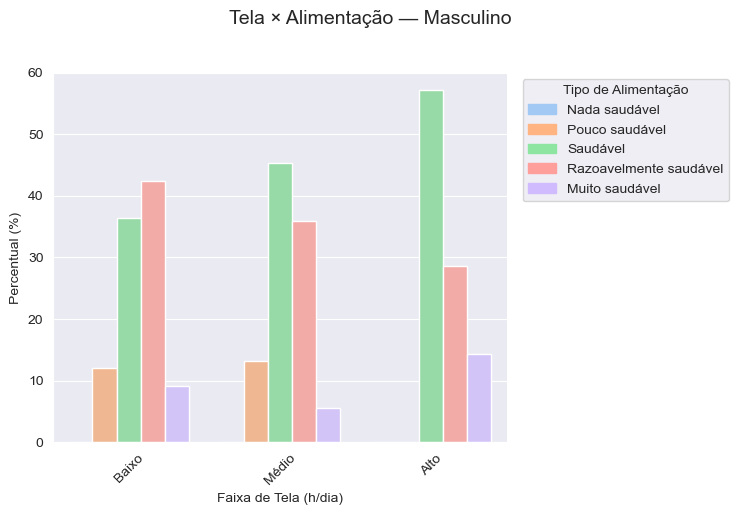

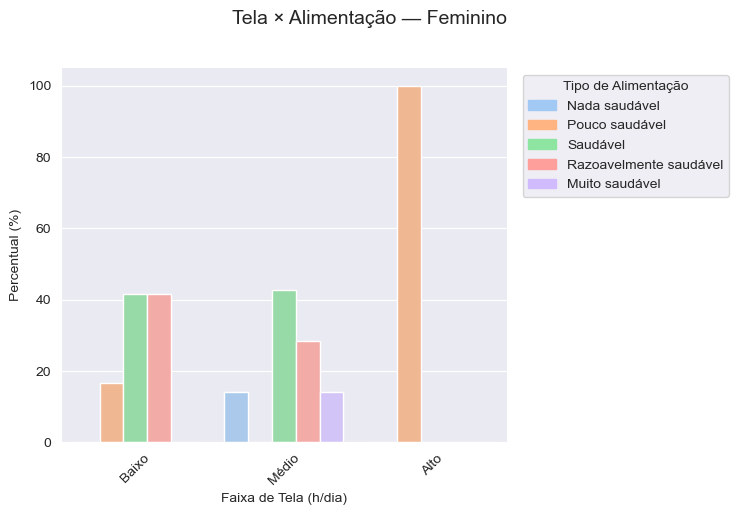

In [641]:
for sexo in ['Masculino', 'Feminino']:
    df = pct_crosstab(
        dados[dados['Sexo']==sexo],
        'faixa_tela', 'Alimentação',
        order_tela, order_alim
    )
    g = sns.catplot(
        data=df, x='faixa_tela', y='Percentual',
        hue='Alimentação', kind='bar',
        palette='pastel',
        order=order_tela, hue_order=order_alim,
        height=5, aspect=1.5, legend=False
    )
    ax = g.ax
    pal = sns.color_palette("pastel", n_colors=len(order_alim))
    handles = [mpatches.Patch(color=pal[i], label=order_alim[i])
               for i in range(len(order_alim))]
    ax.legend(handles=handles,
              title='Tipo de Alimentação',
              bbox_to_anchor=(1.02,1), loc='upper left')
    g.fig.suptitle(f"Tela × Alimentação — {sexo}", y=1.02, fontsize=14)
    g.fig.subplots_adjust(right=0.75)
    ax.set_xlabel("Faixa de Tela (h/dia)")
    ax.set_ylabel("Percentual (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Comentários: 

- Homens passam mais tempo de tela (Alto) e apresentam maior porcentagem de alimentação “Saudável” (~58%)  
- Em faixa de tela média, ambos os sexos têm distribuição parecida de alimentação:  
  - ~45% Saudável  
  - ~35% Pouco saudável  
- Mulheres na faixa “Alto” concentram-se quase que exclusivamente em alimentação “Pouco saudável” (≈100%), sugerindo amostra pequena  
- Nas faixas “Baixo” e “Médio” de TV, déficit de alimentação (“Nada saudável” + “Pouco saudável”) corresponde a ~30–40%  
- Categoria “Muito saudável” é mínima (<15%) em todos os grupos  


## Boxplot:
##Utilizamos o Plotly Express (px.box) para criar um boxplot em que o eixo x representa as categorias de “Alimentação” e o y mostra os valores de IMC. Assim, é possível comparar visualmente a dispersão do IMC em cada grupo.

## Índice de Saudabilidade:
##Como a variável “Alimentação” é qualitativa, criamos um mapeamento para convertê-la em uma variável numérica. Quanto melhor a alimentação, maior o índice atribuído (por exemplo, “Muito saudável” → 4).

## Gráfico de Dispersão:
##Com o px.scatter relacionamos a variável contínua “Indice_saudabilidade” com o IMC. Assim, é possível verificar se existe alguma tendência, por exemplo, se um índice mais alto (alimentação melhor) está associado a um IMC menor ou maior.

In [ ]:
# Preparação dos dados 
dados_binned = dados.copy()
dados_binned['IMC'] = dados_binned['Peso'] / ((dados_binned['Altura'] / 100) ** 2)

# Quartis globais de IMC
q1     = dados_binned['IMC'].quantile(0.25)
median = dados_binned['IMC'].quantile(0.5)
q3     = dados_binned['IMC'].quantile(0.75)


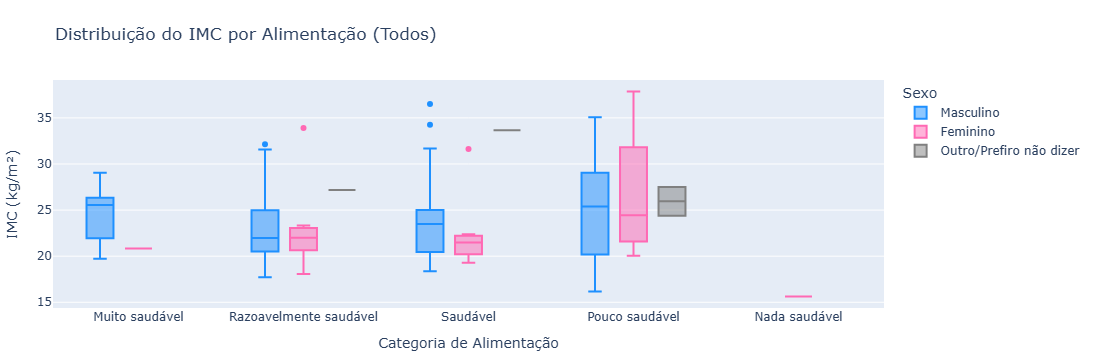

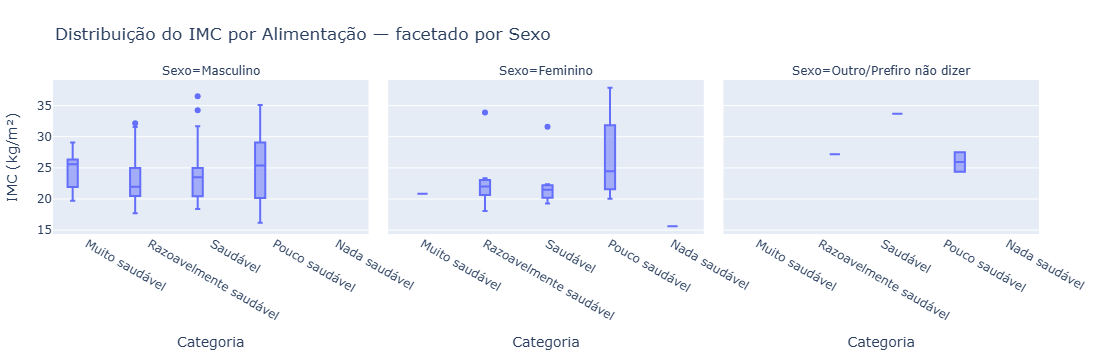

In [643]:
# Boxplot unificado (todos os sexos) ---
# a) sem facets, cor por sexo
fig_all = px.box(
    dados_binned,
    x="Alimentação",
    y="IMC",
    color="Sexo",
    title="Distribuição do IMC por Alimentação (Todos)",
    labels={"Alimentação": "Categoria de Alimentação", "IMC": "IMC (kg/m²)"},
    color_discrete_map={"Masculino":"dodgerblue","Feminino":"hotpink","Outro/Prefiro não dizer":"gray"}
)
fig_all.update_layout(margin=dict(l=40, r=40, t=80, b=40))
fig_all.show()

# b) com facets (lados a lado)
fig_facet = px.box(
    dados_binned,
    x="Alimentação",
    y="IMC",
    facet_col="Sexo",
    category_orders={"Sexo": ["Masculino","Feminino","Outro/Prefiro não dizer"]},
    title="Distribuição do IMC por Alimentação — facetado por Sexo",
    labels={"Alimentação":"Categoria","IMC":"IMC (kg/m²)"}
)
fig_facet.update_layout(margin=dict(l=40, r=40, t=80, b=40))
fig_facet.show()


# Comentários: 

#### A dispersão do IMC nas categorias ‘Nada saudável’ e ‘Pouco saudável’ é maior, com alguns outliers acima de 30 kg/m², sugerindo maior heterogeneidade nestes grupos.

#### A dispersão do IMC nas categorias ‘Nada saudável’ e ‘Pouco saudável’ é maior, com alguns outliers acima de 30 kg/m², sugerindo maior heterogeneidade nestes grupos.

In [645]:
#  Cria o Índice de Saudabilidade
mapping = {
    "Nada saudável": 0,
    "Pouco saudável": 1,
    "Saudável": 2,
    "Razoavelmente saudável": 3,
    "Muito saudável": 4
}
# Mapeia e garante que seja numérico
dados_binned['Indice_saudabilidade'] = dados_binned['Alimentação'].map(mapping).astype(int)

# Para os rótulos do eixo x:
reverse_mapping = {v: k for k, v in mapping.items()}


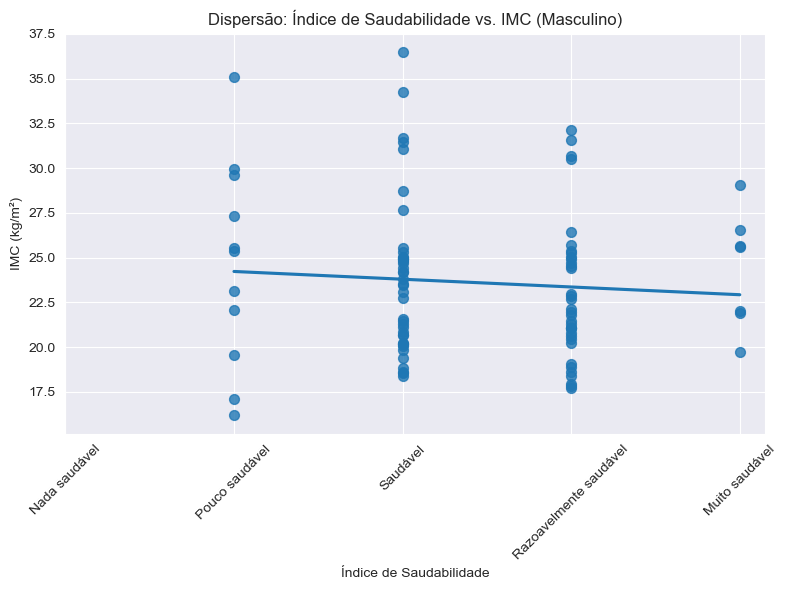

In [647]:


plt.figure(figsize=(8, 6))
sns.regplot(
    x="Indice_saudabilidade",
    y="IMC",
    data=dados_binned[dados_binned['Sexo']=="Masculino"],
    scatter_kws={'s': 50},
    ci=None
)
plt.xticks(
    ticks=sorted(reverse_mapping),
    labels=[reverse_mapping[v] for v in sorted(reverse_mapping)],
    rotation=45
)
plt.title("Dispersão: Índice de Saudabilidade vs. IMC (Masculino)")
plt.xlabel("Índice de Saudabilidade")
plt.ylabel("IMC (kg/m²)")
plt.tight_layout()
plt.show()


# Comentários:
### A quase horizontalidade da reta de regressão, tanto em homens quanto em mulheres, indica fraca correlação entre qualidade percebida da alimentação e IMC nesta amostra

# Comparando O IMC da turma como IMC dos Brasileiros:

- [Diagnóstico da obesidade deverá ter novos parâmetros a partir de 2025 – SBCBM](https://sbcbm.org.br/diagnostico-da-obesidade-devera-ter-novos-parametros-a-partir-de-2025/)
- [Nova classificação visa ampliar diagnóstico e tratamento da obesidade – VEJA](https://veja.abril.com.br/saude/nova-classificacao-visa-ampliar-diagnostico-e-tratamento-da-obesidade/)
- [Vigitel Brasil 2023 – Ministério da Saúde](https://www.gov.br/saude/pt-br/centrais-de-conteudo/publicacoes/svsa/vigitel/vigitel-brasil-2023-vigilancia-de-fatores-de-risco-e-protecao-para-doencas-cronicas-por-inquerito-telefonico/view)


# Plotando os Histogramas Comparativos:

### Sobre a escolha do gráfico e composição visual:

- **O histograma** permite observar a forma da distribuição de IMC na amostra, com boa percepção de frequência em cada faixa.

- **As faixas coloridas no fundo** destacam visualmente a nova classificação oficial do IMC, facilitando a interpretação segundo os critérios de 2025.

- **A sobreposição da curva de densidade** suaviza a distribuição e permite identificar assimetrias ou concentração de valores.

- **As linhas verticais dos quartis e da mediana** adicionam referência estatística objetiva à distribuição.

- **A borda das barras e o contorno reforçado** oferecem contraste visual, facilitando a leitura sem sobrecarregar o gráfico.


1. Predomínio de “Peso Normal” na turma
A maior parte da turma está concentrada entre 18,5 e 24,9 kg/m².

Na população brasileira, segundo dados recentes do SISVAN e Ministério da Saúde, a maior parte está entre sobrepeso e obesidade grau I — ou seja, a turma apresenta um perfil mais saudável que a média nacional.

2. Baixa incidência de obesidade
A turma apresenta poucos casos nas faixas obesidade grau II e III, enquanto no Brasil esses grupos estão crescendo especialmente entre adultos jovens e mulheres.

Isso sugere que a amostra pode estar associada a um público com maior nível de instrução, acesso à informação e rotina menos sedentária (ex: estudantes universitários).

3. Menor assimetria e menos cauda à direita
A distribuição do IMC da turma é mais simétrica e concentrada.

A curva nacional costuma apresentar cauda longa à direita, indicando excesso de casos de sobrepeso e obesidade, o que não é o caso aqui.

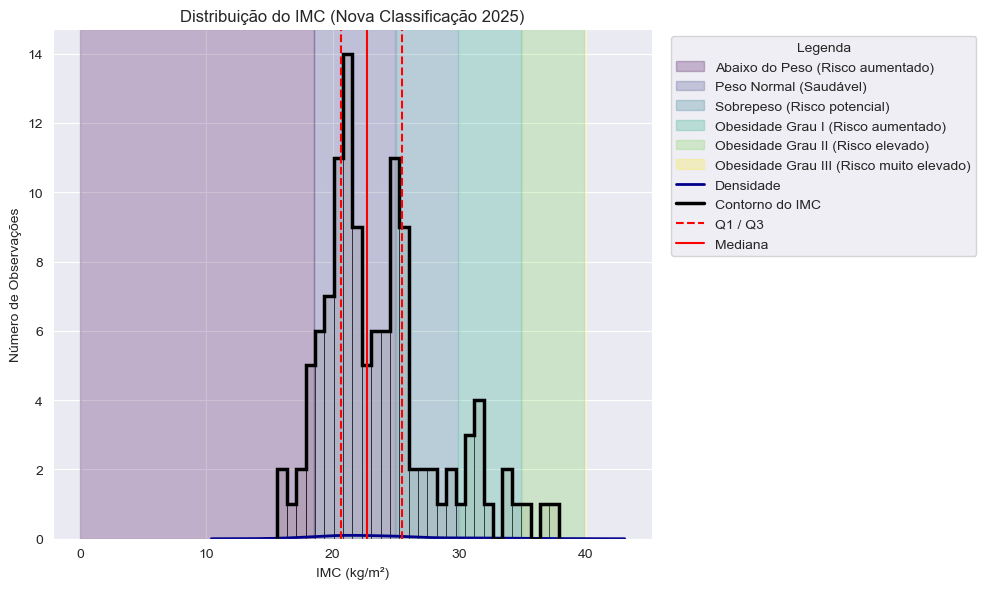

In [681]:
# Quartis
q1 = dados['IMC'].quantile(0.25)
q2 = dados['IMC'].median()
q3 = dados['IMC'].quantile(0.75)

# 🆕 Faixas oficiais 2025
faixas = [
    (0, 18.5, 'Abaixo do Peso', 'Risco aumentado'),
    (18.5, 24.9, 'Peso Normal', 'Saudável'),
    (25.0, 29.9, 'Sobrepeso', 'Risco potencial'),
    (30.0, 34.9, 'Obesidade Grau I', 'Risco aumentado'),
    (35.0, 39.9, 'Obesidade Grau II', 'Risco elevado'),
    (40.0, np.inf, 'Obesidade Grau III', 'Risco muito elevado'),
]

# Paleta de cores
pal = plt.cm.viridis
n = len(faixas)

# Plotagem
fig, ax = plt.subplots(figsize=(10,6))

# Histograma com contorno fino
counts, bins, _ = ax.hist(
    dados['IMC'],
    bins=30,
    color='lightgray',
    edgecolor='black',
    linewidth=0.6,
    alpha=0.8
)

# Faixas coloridas
for i, (low, high, nome, risco) in enumerate(faixas):
    ax.axvspan(
        low, high,
        color=pal(i / (n - 1)),
        alpha=0.25
    )

# Curva KDE
sns.kdeplot(
    dados['IMC'],
    ax=ax,
    color='darkblue',
    linewidth=2,
    label="Densidade"
)

# Contorno da amostra
ax.hist(
    dados['IMC'],
    bins=bins,
    histtype='step',
    linewidth=2.5,
    edgecolor='black',
    label='Contorno do IMC'
)

# Quartis e mediana
for q, label, style in zip([q1, q2, q3], ['Q1', 'Mediana', 'Q3'], ['--', '-', '--']):
    ax.axvline(x=q, color='red', linestyle=style, linewidth=1.5, label=label)

# Legenda
handles = [
    plt.Rectangle((0, 0), 1, 1, color=pal(i / (n - 1)), alpha=0.25)
    for i in range(n)
]
labels = [f"{nome} ({risco})" for _, _, nome, risco in faixas]

handles += [
    plt.Line2D([], [], color='darkblue', lw=2, label='Densidade'),
    plt.Line2D([], [], color='black', lw=2.5, label='Contorno do IMC'),
    plt.Line2D([], [], color='red', linestyle='--', lw=1.5, label='Q1 / Q3'),
    plt.Line2D([], [], color='red', linestyle='-', lw=1.5, label='Mediana')
]
ax.legend(handles, labels + ['Densidade', 'Contorno do IMC', 'Q1 / Q3', 'Mediana'],
          title="Legenda", bbox_to_anchor=(1.02, 1))

# Eixos e título
ax.set_title("Distribuição do IMC (Nova Classificação 2025)")
ax.set_xlabel("IMC (kg/m²)")
ax.set_ylabel("Número de Observações")

plt.tight_layout()
plt.show()
